<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/python_ml_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 알고리즘


In [ ]:
!pip install mglearn

In [6]:
import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [41]:
# 한글 폰트 설치
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline

# 나눔 고딕 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

NanumMyeongjo


X.shape: (26, 2)


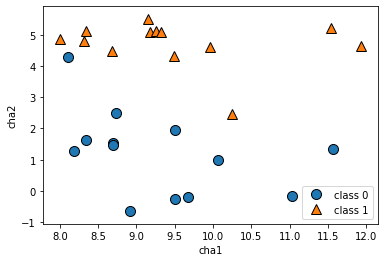

In [42]:
# 데이터 셋 만들기
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y) # y값이 특성을 의미함
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("cha1")
plt.ylabel("cha2")
print('X.shape:',X.shape)

(40, 1)

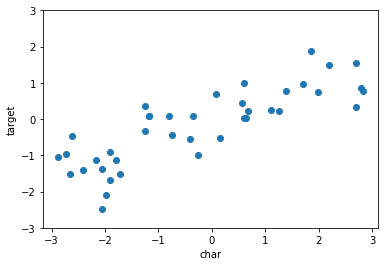

In [13]:
# 회귀 알고리즘, 저차원 데이터셋 이용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) # 좌표 크기
plt.xlabel("char")
plt.ylabel("target")
X.shape

In [18]:
# 유방암, 고차원 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()
cancer.data.shape

(569, 30)

In [20]:
import numpy as np

print("클래스별 샘플 갯수: \n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# cancer.target_names         > ['malignant', 'benign'] 양성 음성
# np.bincount(cancer.target)  > [212, 357]

클래스별 샘플 갯수: 
 {'malignant': 212, 'benign': 357}


In [21]:
# 특성 이름
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [27]:
# 특성 확장
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# k-최근접 이웃 분류
- 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

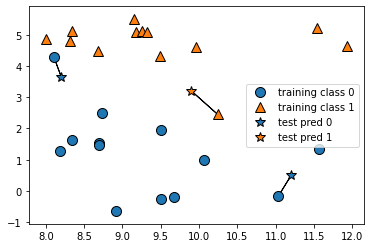

In [43]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

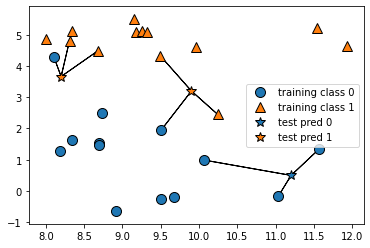

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [30]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# train 19개 test 7개 : 총 26개

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
# 훈련으로 분류모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [34]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


## KNeighborsClassifier 분석

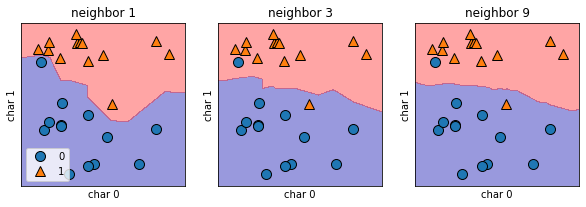

In [46]:
# 결정경계 이웃이 많을 수록 경계는 단순해지고, 극단의 경우 예측은 모두 같은 값이 된다.

fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메소드는 self 오프젝트를 리턴합니다.
  # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
  
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("neighbor {}".format(n_neighbors))
  ax.set_xlabel("char 0")
  ax.set_ylabel("char 1")
axes[0].legend(loc=3)


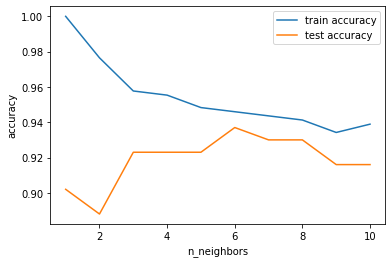

In [47]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))
  
  
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
